([<matplotlib.axis.XTick at 0x21770d13700>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

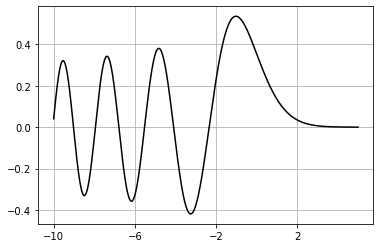

In [4]:
#A1
from scipy import special
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-10,5,10000)
plt.plot(x,special.airy(x)[0],'k')
plt.grid()
plt.xticks([-10,-6,-2,2])

In [5]:
#A2
import numpy.linalg as alg
import matplotlib.pyplot as plt
import scipy
import numpy as np
from scipy.constants import hbar
from scipy.integrate import nquad 

global a,v0,N,dx,m
m=1
a=1
v0=300
N=int(1e2)
dx=1e-6

def Psi(N,n_od): #n_od:ordre de l'état excité
    E_n= lambda n : (n*np.pi*hbar/a)**2/(2*m)
    v_tri= lambda x : v0/a*x
    delta= lambda n,m : int(n==m)
    intg= lambda n,m : nquad(lambda x : v_tri(x)*np.sin(n*np.pi*x)*np.sin(m*np.pi*x),[[0,1]],opts=[{'limit':100}])
    H_nm= lambda n,m : n**2*delta(n,m)+2*intg(n,m)[0]
    
    H=np.zeros((N,N))
    for i in range(N):
        for j in range(N): 
            H[i,j]=H_nm(i+1,j+1)
    
    phi= lambda n,x : np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    
    [spectre,vecs_p]=alg.eig(H)
    #tri des vecteurs propres
    ordre=spectre.argsort()
    vecs_p=vecs_p[:,ordre]
    spectre=spectre[ordre]
    
    vec=vecs_p[:,n_od]
    e=spectre[n_od]
    
    def f(x):
        f_=0
        for i in range(N):
            f_+=vec[i]*phi(i+1,x)
        return f_ 
    
    return f,e

Text(0.5, 1.0, '$E_2=$115.34')

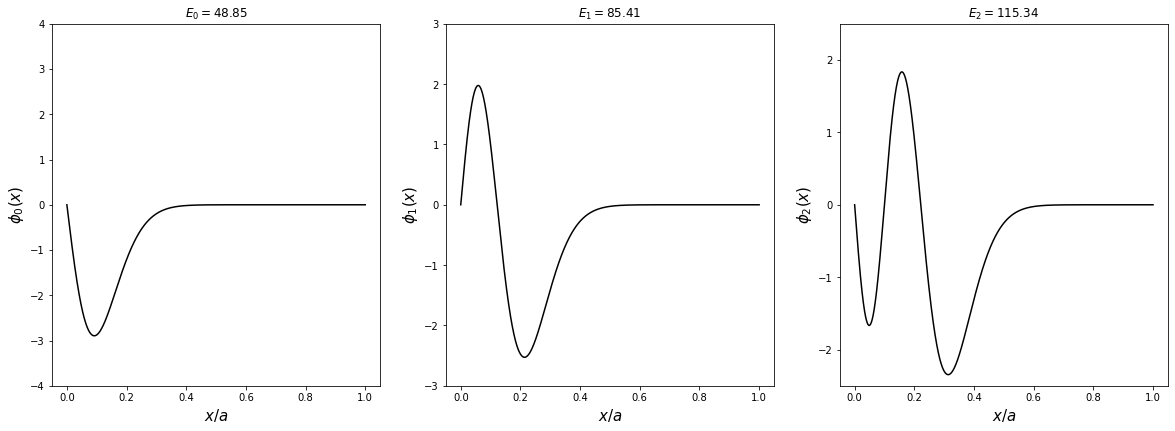

In [6]:
#A3
vec_x=np.linspace(0,a,int(1/dx))
fig,ax=plt.subplots(1,3,figsize=(20,6.66))

psi_0,e_0=Psi(N,0)
ax[0].plot(vec_x,psi_0(vec_x),'k')
ax[0].set_ylim([-4,4])
ax[0].set_ylabel('$\phi_0(x)$',fontsize=15)
ax[0].set_xlabel('$x/a$',fontsize=15)
ax[0].set_title('$E_0=$'+str(round(e_0,2)))

psi_1,e_1=Psi(N,1)
ax[1].plot(vec_x,-psi_1(vec_x),'k')
ax[1].set_ylim([-3,3])
ax[1].set_ylabel('$\phi_1(x)$',fontsize=15)
ax[1].set_xlabel('$x/a$',fontsize=15)
ax[1].set_title('$E_1=$'+str(round(e_1,2)))

psi_2,e_2=Psi(N,2)
ax[2].plot(vec_x,-psi_2(vec_x),'k')
ax[2].set_ylim([-2.5,2.5])
ax[2].set_ylabel('$\phi_2(x)$',fontsize=15)
ax[2].set_xlabel('$x/a$',fontsize=15)
ax[2].set_title('$E_2=$'+str(round(e_2,2)))

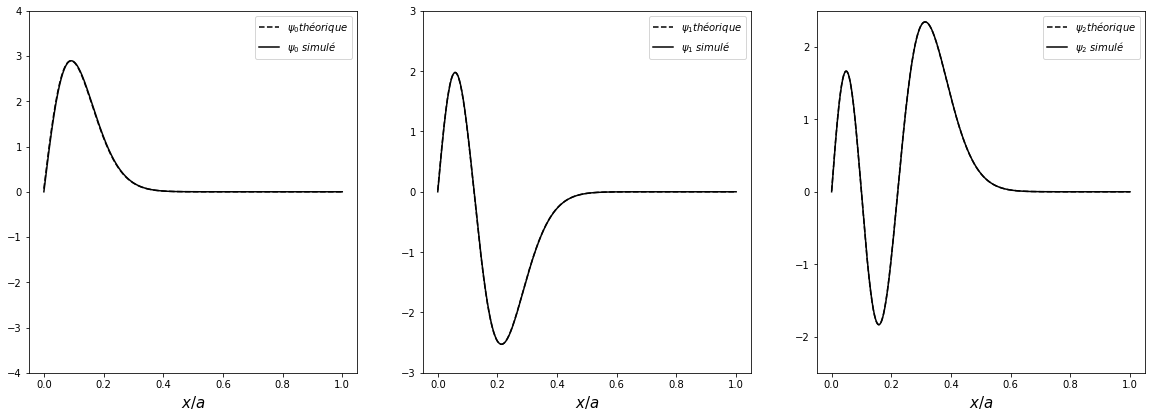

In [12]:
#A4
epsi = lambda n :(3*v0*(4*n-1)/(8))**(2/3)
psi_th = lambda n,x : special.airy((v0*np.pi**2)**(1/3)*(x/a-epsi(n)/v0))[0]

C_0=max(abs(psi_0(vec_x)))/max(abs(psi_th(1,vec_x)))
C_1=max(abs(psi_1(vec_x)))/max(abs(psi_th(2,vec_x)))
C_2=max(abs(psi_2(vec_x)))/max(abs(psi_th(3,vec_x)))

vec_x=np.linspace(0,1,int(1/dx))
fig,ax=plt.subplots(1,3,figsize=(20,6.66))

ax[0].plot(vec_x,C_0*psi_th(1,vec_x),'k--',label='$\psi_0 théorique$')
ax[1].plot(vec_x,-C_1*psi_th(2,vec_x),'k--',label='$\psi_1 théorique$')
ax[2].plot(vec_x,C_2*psi_th(3,vec_x),'k--',label='$\psi_2 théorique$')

ax[0].plot(vec_x,-psi_0(vec_x),'k-',label='$\psi_0 \ simulé$')
ax[0].set_ylim([-4,4])
ax[0].set_xlabel('$x/a$',fontsize=15)


ax[1].plot(vec_x,-psi_1(vec_x),'k-',label='$\psi_1 \ simulé$')
ax[1].set_ylim([-3,3])
ax[1].set_xlabel('$x/a$',fontsize=15)


ax[2].plot(vec_x,psi_2(vec_x),'k-',label='$\psi_2 \ simulé$')
ax[2].set_ylim([-2.5,2.5])
ax[2].set_xlabel('$x/a$',fontsize=15)

ax[0].legend()
ax[1].legend()
ax[2].legend()

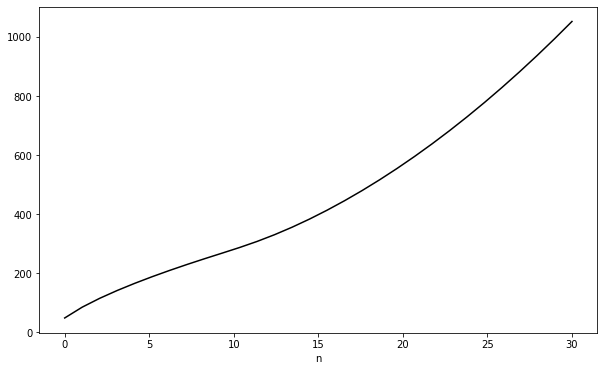

In [14]:
#A5
    
N=75
n_od=0
E_n= lambda n : (n*np.pi*hbar/a)**2/(2*m)
v_tri= lambda x : v0/a*x
delta= lambda n,m : int(n==m)
intg= lambda n,m : nquad(lambda x : v_tri(x)*np.sin(n*np.pi*x)*np.sin(m*np.pi*x),[[0,1]],opts=[{'limit':100}])
H_nm= lambda n,m : n**2*delta(n,m)+2*intg(n,m)[0]
    
H=np.zeros((N,N))
for i in range(N):
    for j in range(N): 
        H[i,j]=H_nm(i+1,j+1)

phi = lambda n,x : np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    
[spectre,vecs_p]=alg.eig(H)
#tri des vecteurs propres
ordre=spectre.argsort()
vecs_p=vecs_p[:,ordre]
spectre=spectre[ordre]
    
plt.figure(figsize=[10,6])    
plt.xlabel("n")
plt.plot(np.linspace(0,30,30),spectre[:30],'k-')

Text(0.5, 1.0, "fitting des eps(n), C=154.79, b=63.4, C'=-19.08")

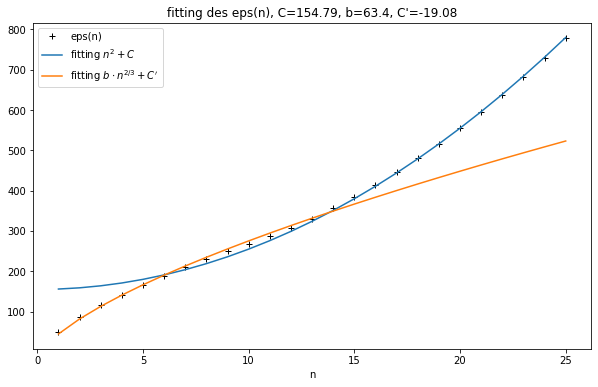

In [269]:
#A6
from scipy.optimize import curve_fit

plt.figure(figsize=[10,6])

vec_n=np.linspace(1,25,25)
C=curve_fit(lambda n,C:n**2+C,vec_n[15:25],spectre[15:25])[0][0]
fit_h=lambda n:n**2+C
vec_fit_high=[fit_h(n+1) for n in range(0,25)]
plt.plot(vec_n,spectre[:25],'k+',label='eps(n)')
plt.plot(vec_n,vec_fit_high,label="fitting $n^2+C$")

b,cp=curve_fit(lambda n,b,C:b*n**(2/3)+C,vec_n[0:15],spectre[0:15])[0]
fit_l=lambda n:b*n**(2/3)+cp
vec_fit_low=[fit_l(n+1) for n in range(0,25)]
plt.plot(vec_n,vec_fit_low,label="fitting $b \cdot n^{2/3}+C'$")

plt.xlabel('n')
plt.legend()
plt.title('fitting des eps(n), C='+str(round(C,2))+', b='+str(round(b,2))+", C'="+str(round(cp,2)))


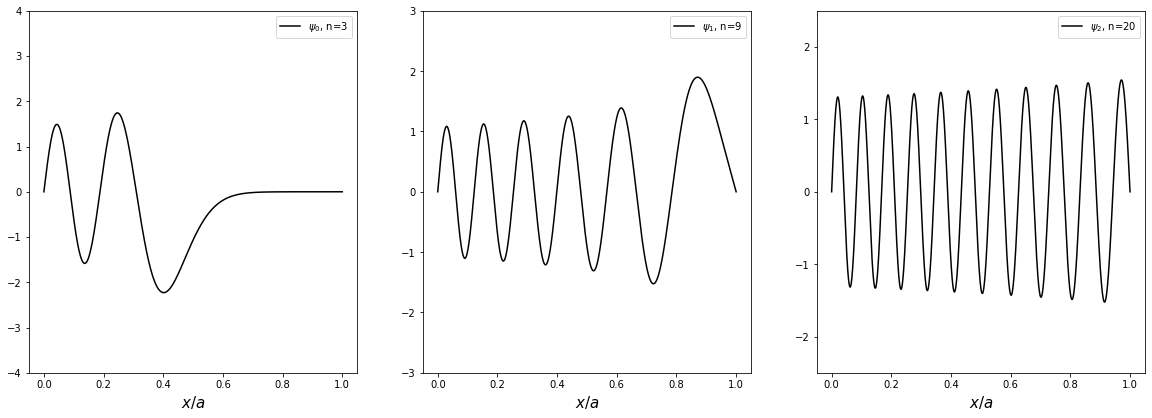

In [25]:
#A7

vec_x=np.linspace(0,1,int(1/dx))
fig,ax=plt.subplots(1,3,figsize=(20,6.66))

ax[0].plot(vec_x,Psi(50,3)[0](vec_x),'k-',label='$\psi_0$, n=3')
ax[0].set_ylim([-4,4])
ax[0].set_xlabel('$x/a$',fontsize=15)


ax[1].plot(vec_x,Psi(50,10)[0](vec_x),'k-',label='$\psi_1$, n=9')
ax[1].set_ylim([-3,3])
ax[1].set_xlabel('$x/a$',fontsize=15)


ax[2].plot(vec_x,Psi(50,20)[0](vec_x),'k-',label='$\psi_2$, n=20')
ax[2].set_ylim([-2.5,2.5])
ax[2].set_xlabel('$x/a$',fontsize=15)

ax[0].legend()
ax[1].legend()
ax[2].legend()

(0.0, 0.75)

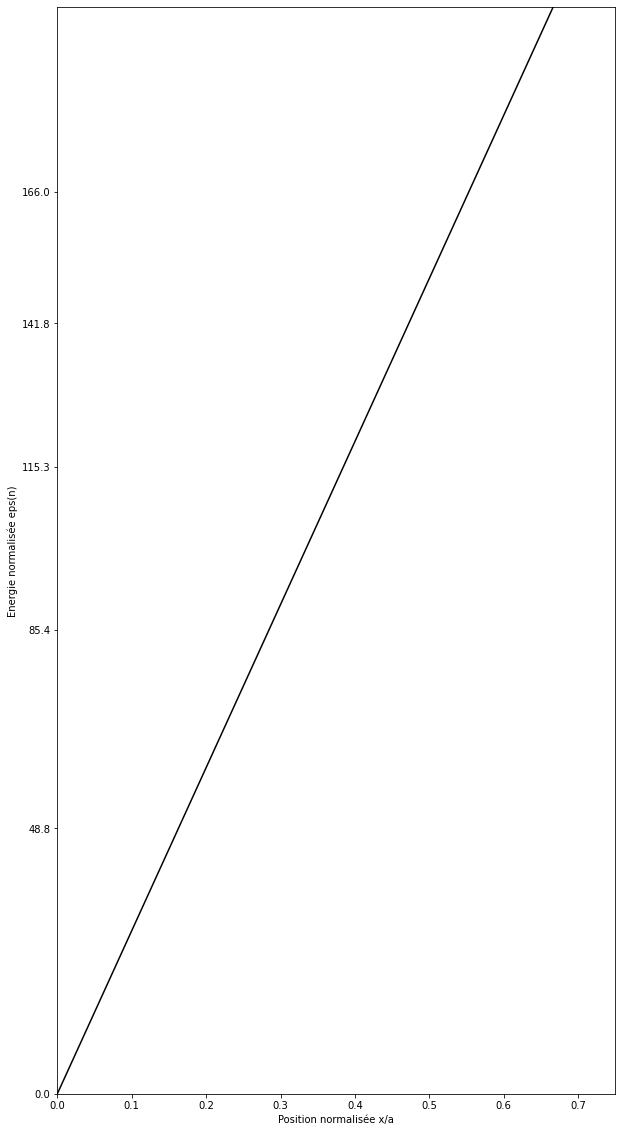

In [52]:
#A8.1

plt.figure(figsize=[10,20])
plt.yticks([0]+list(spectre[0:5]))
plt.plot(vec_x,v0/a*vec_x,'k')
plt.xlabel('Position normalisée x/a')
plt.ylabel('Energie normalisée eps(n)')
plt.ylim([0,200])
plt.xlim([0,0.75])

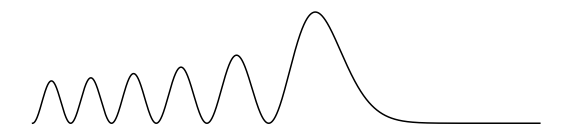

In [62]:
#A8.2
global A
A=1

fig,ax=plt.subplots(figsize=[10,2.25])
fig.patch.set_visible(False)
ax.axis('off')

n_plt=5

plt.plot(vec_x,A*abs(Psi(50,n_plt)[0](vec_x))**2,'k')